<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Customer_segmentation_by_K_Means_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This case study will implement **KMeans algorithm** for clustering modeling to get insight about behaviour group of credit card user.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Load dataset " Credit card"**

In [3]:
df = pd.read_csv('/content/sample_data/CC GENERAL (1).csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**2. Data preprocessing**

In [4]:
df.shape # Dataset has 8950 columns and 18 rows

(8950, 18)

In [5]:
df = df.drop('CUST_ID', axis=1) # We drop noise data "CUST_ID"
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape  # Now dataset has 17 columns

(8950, 17)

In [7]:
df.isna().sum()  # We find missing values ( 1 data on 'CREDIT_LIMIT' column and 313 datas on 'MINIMUM_PAYMENTS' )

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [8]:
df['CREDIT_LIMIT'].value_counts()   # We get data 'CREDIT_LIMIT' = 3000.000000 as mode.

,count
CREDIT_LIMIT,
3000.000000,784
1500.000000,722
1200.000000,621
1000.000000,614
2500.000000,612
...,...
3777.777778,1
650.000000,1
1450.000000,1


In [9]:
df['CREDIT_LIMIT'].fillna(3000.000000, inplace=True)  # We fill a missing value with mode data.

/tmp/ipython-input-2592649202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(3000.000000, inplace=True)  # We fill a missing value with mode data.


In [10]:
df['MINIMUM_PAYMENTS'].value_counts()   # # We get data 'MINIMUM_PAYMENTS' = 299.351881 as mode

,count
MINIMUM_PAYMENTS,
299.351881,2
342.286490,1
229.411418,1
271.528169,1
6404.855484,1
...,...
616.430163,1
114.231080,1
46.573054,1


In [11]:
df['MINIMUM_PAYMENTS'].fillna(299.351881, inplace=True)   # We fill a missing value with mode data.

/tmp/ipython-input-3226988736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(299.351881, inplace=True)   # We fill a missing value with mode data.


In [12]:
df.info()   # Now dataset has not missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

**The best practise we have to do outlier handling before we conduct scaling data. For this cased study we skip this stage because we want to make simple and showing the result of Kmeans algorithm.**

In [14]:
nums=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
      'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
      'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-2534158414.py:6: UserWarning: Tight layout not applied. tight_layout cannot 

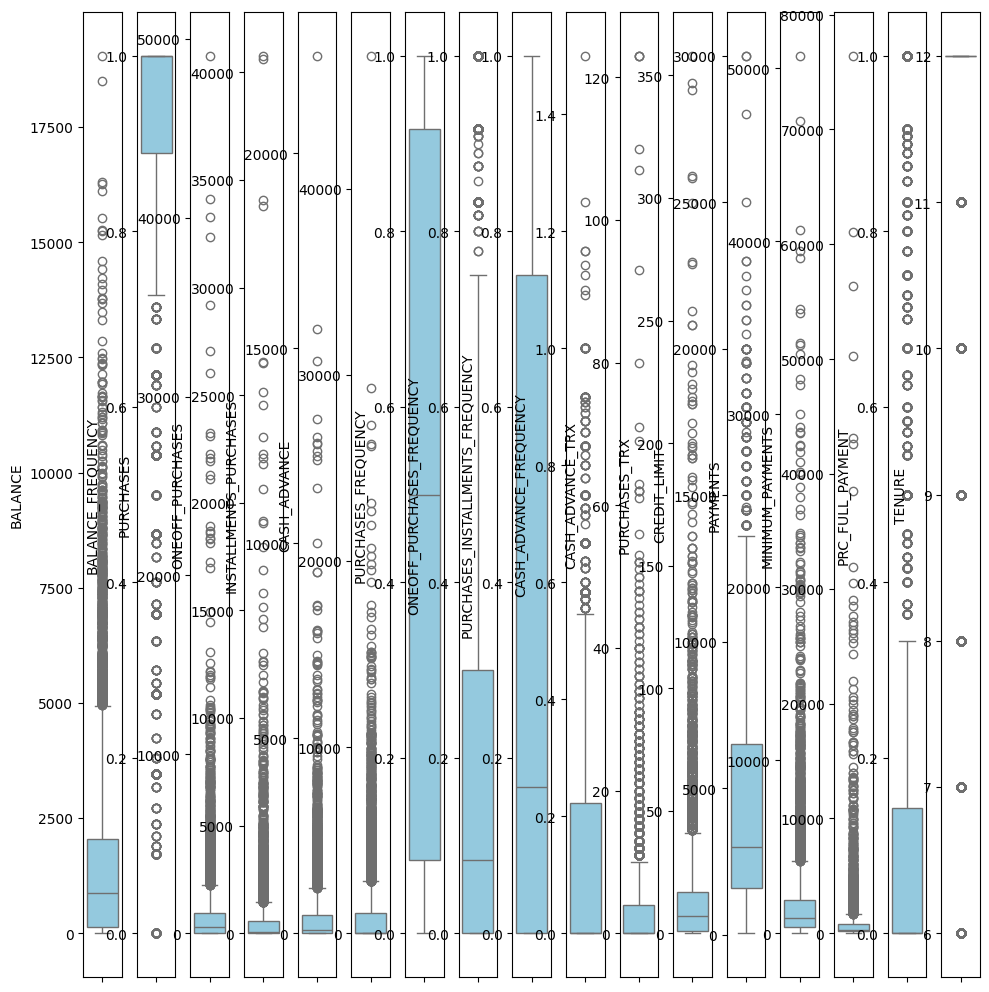

In [15]:
features=nums   # We see the outlier in each columns(featuers)
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],color='skyblue')
    plt.tight_layout()

**Sample how to manage outlier.**

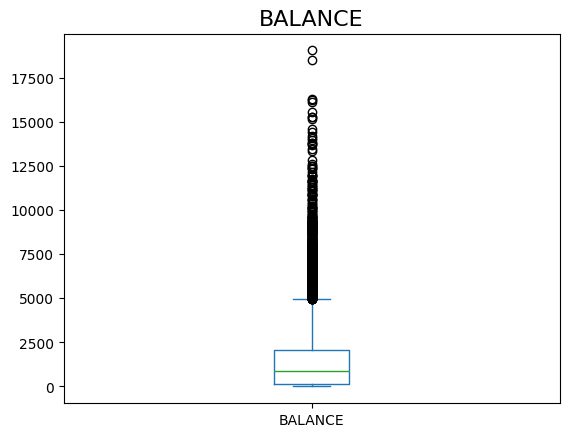

In [16]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=16)
plt.show()

In [17]:
Q1b = df['BALANCE'].quantile(0.25) # Finding Q1 value
Q3b = df['BALANCE'].quantile(0.75) # Finding Q3 value
IQRb = Q3b-Q1b # Calculating IQR
print('Q1b= ', Q1b)
print('Q3b = ', Q3b)
print('IQR BALANCE = ', IQRb)

Q1b=  128.2819155
Q3b =  2054.1400355
IQR BALANCE =  1925.85812


In [9]:
nilai_min = df['BALANCE'].min() # Finding min.value
nilai_max = df['BALANCE'].max() # Finding max.value

min_IQRb = Q1b - 1.5 * IQRb # Calculating min. IQR
max_IQRb = Q3b + 1.5 * IQRb # Calculating max. IQR

# Conditional to find low outlier
if (nilai_min < min_IQRb):
 print('Low outlier is found <', min_IQRb)
 # Showing low outlier index
 print('Low Outlier Index :', list(df[df['BALANCE'] < min_IQRb].index))

# Conditional to find high outlier
if (nilai_max > max_IQRb):
 print('High outlier is found >', max_IQRb)
 # Showing high outlier index
 print('High outlier Index : ', list(df[df['BALANCE'] > max_IQRb].index))

High outlier is found > 4942.9272155
High outlier Index :  [15, 21, 24, 28, 30, 32, 36, 38, 44, 59, 70, 75, 79, 86, 87, 89, 90, 107, 109, 112, 113, 120, 124, 128, 133, 138, 142, 143, 150, 153, 156, 165, 174, 193, 195, 199, 203, 207, 208, 210, 220, 223, 224, 236, 248, 249, 254, 258, 263, 265, 273, 274, 280, 289, 291, 297, 304, 321, 322, 352, 357, 367, 368, 369, 371, 376, 380, 387, 393, 398, 404, 416, 417, 423, 428, 429, 430, 435, 441, 445, 451, 453, 468, 470, 488, 491, 495, 501, 509, 520, 526, 537, 539, 545, 550, 551, 552, 557, 558, 569, 576, 577, 582, 585, 591, 597, 602, 606, 610, 613, 615, 622, 637, 643, 646, 647, 652, 669, 676, 679, 681, 696, 708, 710, 716, 723, 726, 735, 739, 755, 757, 760, 762, 763, 768, 780, 782, 786, 800, 842, 848, 851, 853, 856, 866, 878, 883, 886, 898, 902, 903, 909, 916, 922, 928, 939, 977, 989, 1012, 1029, 1030, 1033, 1037, 1042, 1059, 1063, 1091, 1100, 1109, 1114, 1130, 1145, 1147, 1163, 1171, 1195, 1202, 1211, 1216, 1229, 1242, 1262, 1264, 1282, 1288, 1297,

In [18]:
df=df.drop(df[df.BALANCE > 4942].index, axis=0)

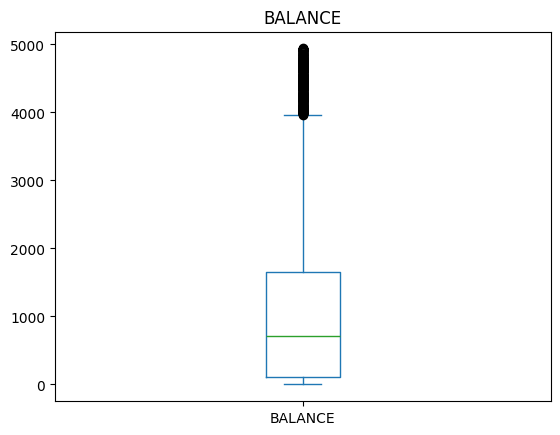

In [19]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

In [20]:
df=df.drop(df[df.BALANCE > 4000].index, axis=0)

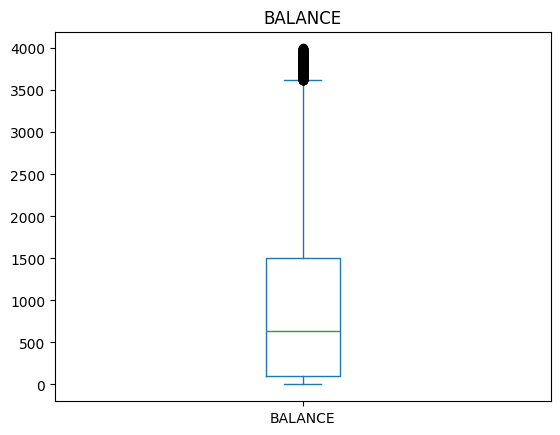

In [21]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

In [22]:
df=df.drop(df[df.BALANCE > 3300].index, axis=0)

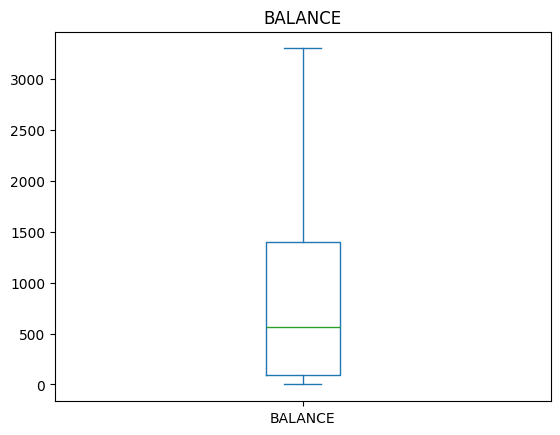

In [23]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

**2.Data Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler  # We use StandardScaler for scaling data

In [25]:
X=df.values[:,:]
X.shape

(7664, 17)

In [26]:
X=np.nan_to_num(X)

In [27]:
df_cc=StandardScaler().fit_transform(X)
df_cc

array([[-0.93694333, -0.15971777, -0.47134984, ..., -0.30262308,
        -0.57447371,  0.37136795],
       [ 2.66969257,  0.20336967, -0.52796405, ...,  0.40972903,
         0.14490708,  0.37136795],
       [ 1.86280132,  0.56645712, -0.06913379, ...,  0.06986428,
        -0.57447371,  0.37136795],
       ...,
       [-0.95690926, -0.0992052 , -0.44227126, ..., -0.34622071,
         0.23483049, -3.98278401],
       [-0.96824982, -0.0992052 , -0.52796405, ..., -0.3665816 ,
         0.23483049, -3.98278401],
       [-0.55842586, -0.76486352,  0.12081459, ..., -0.34173766,
        -0.57447371, -3.98278401]])

**3.Modeling data by KMeans**

In [28]:
from sklearn.cluster import KMeans
clstr_nums = 2
k_means = KMeans(init="k-means++", n_clusters=clstr_nums, n_init=12)
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

In [29]:
k_means_lbl = k_means.labels_ # We define the label for clustering
k_means_lbl

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [30]:
k_means_cltr_cntr = k_means.cluster_centers_  # We determine the cluster center
k_means_cltr_cntr

array([[1.05583941e+03, 8.85059565e-01, 2.12368238e+03, 1.37987849e+03,
        7.44183628e+02, 8.93472587e+02, 6.43688316e-01, 3.96381582e-01,
        4.50192724e-01, 9.13049140e-02, 2.40181098e+00, 2.63588002e+01,
        8.22486495e+03, 3.17377146e+03, 4.29362429e+02, 2.74762853e-01,
        1.17990945e+01],
       [8.04206478e+02, 8.50115005e-01, 5.19901343e+02, 2.56112683e+02,
        2.64119113e+02, 5.19067910e+02, 4.53449516e-01, 1.35656487e-01,
        3.45672493e-01, 1.09100731e-01, 2.32050195e+00, 9.67068001e+00,
        2.43605006e+03, 9.14675278e+02, 5.67689448e+02, 1.48302676e-01,
        1.13951162e+01]])

In [31]:
df['CLUSTER']=k_means_lbl  # We merge "CLUSTER" colomn to dataframe

In [32]:
df.sample(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3148,1876.290248,1.000000,63.62,63.62,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2000.0,383.273938,663.925938,0.000000,12,1
673,1162.770552,1.000000,533.36,0.00,533.36,19.292323,0.666667,0.000000,0.583333,0.083333,1,8,1200.0,632.227172,1395.576542,0.000000,12,1
8660,848.449010,0.700000,0.00,0.00,0.00,1371.216719,0.000000,0.000000,0.000000,0.100000,1,0,1500.0,265.306179,301.626153,0.000000,10,1
1475,2550.528085,1.000000,0.00,0.00,0.00,3155.857852,0.000000,0.000000,0.000000,0.800000,17,0,3000.0,674.847656,616.794193,0.000000,10,1
4908,2332.496766,1.000000,0.00,0.00,0.00,1848.691278,0.000000,0.000000,0.000000,0.083333,1,0,9700.0,803.519921,548.266320,0.000000,12,0
6054,1764.972148,1.000000,95.44,0.00,95.44,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,5000.0,2686.897850,427.511065,0.000000,12,1
1312,50.435246,0.636364,553.73,553.73,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,8,13000.0,371.230170,118.538181,0.545455,12,0
8169,0.000000,0.000000,136.71,0.00,136.71,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,3000.0,311.673478,299.351881,0.000000,12,1
8709,181.275057,0.400000,192.23,192.23,0.00,1209.772510,0.300000,0.300000,0.000000,0.300000,10,5,2000.0,1088.224155,138.292112,0.000000,10,1
2456,117.777688,0.727273,853.30,853.30,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2000.0,851.921672,73.600798,0.000000,12,1


In [33]:
from sklearn.metrics import silhouette_score

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cc)
    score = silhouette_score(df_cc, labels)
    print(f"K={k}, Silhouette Score={score}")


K=2, Silhouette Score=0.20277240465866173
K=3, Silhouette Score=0.18330993246497998
K=4, Silhouette Score=0.1759592107825718
K=5, Silhouette Score=0.18306154638431493
K=6, Silhouette Score=0.18836904597007834
K=7, Silhouette Score=0.1765997792643952
K=8, Silhouette Score=0.18153852757918387
K=9, Silhouette Score=0.17165968523701872


In [34]:
df['CLUSTER'].value_counts()  # We observe the distribution data by cluster group. Cluster 2 is the most. Cluster 1 is smallest

,count
CLUSTER,
1,5900
0,1764


In [35]:
df.groupby('CLUSTER').mean()  # We can get the information about centroid for each feature based on cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,1055.560924,0.885379,2125.145255,1381.219892,744.305748,891.972629,0.643885,0.396867,0.450061,0.091224,2.378685,26.362245,8230.349412,3174.428598,429.243008,0.275230,11.798753
1,804.417690,0.850037,520.279449,256.283032,264.326702,519.706747,0.453487,0.135644,0.345765,0.109116,2.327458,9.678136,2437.353766,915.627499,567.654817,0.148227,11.395424


**INSIGHT**. **CLUSTER 0** = user has medium Balence and medium transaction/shopping. **CLUSTER 1** = user has many Balance and many transaction/shopping. **CLUSTER 2** = user has small Balance and small transaction/shopping

In [36]:
df.groupby('CLUSTER').describe()

BALANCE                                                         \
          count         mean          std  min         25%         50%   
CLUSTER                                                                  
0        1764.0  1055.560924  1020.908849  0.0  162.891708  633.383943   
1        5900.0   804.417690   819.954018  0.0   71.180235  546.108884   

                                  BALANCE_FREQUENCY            ...  \
                 75%          max             count      mean  ...   
CLUSTER                                                        ...   
0        1898.058897  3298.692478            1764.0  0.885379  ...   
1        1305.902517  3294.379550            5900.0  0.850037  ...   

        PRC_FULL_PAYMENT       TENURE                                        \
                     75%  max   count       mean       std  min   25%   50%   
CLUSTER                                                                       
0               0.500000  1.0  1764.0  11.798753  0.832397  6.0  12.0  12.0   
1               0.142857  1.0  5900.0  11.395424  1.490802  6.0  12.0  12.0   

                     
          75%   max  
CLUSTER              
0        12.0  12.0  
1        12.0  12.0  

[2 rows x 136 columns]

**4. Visualization**

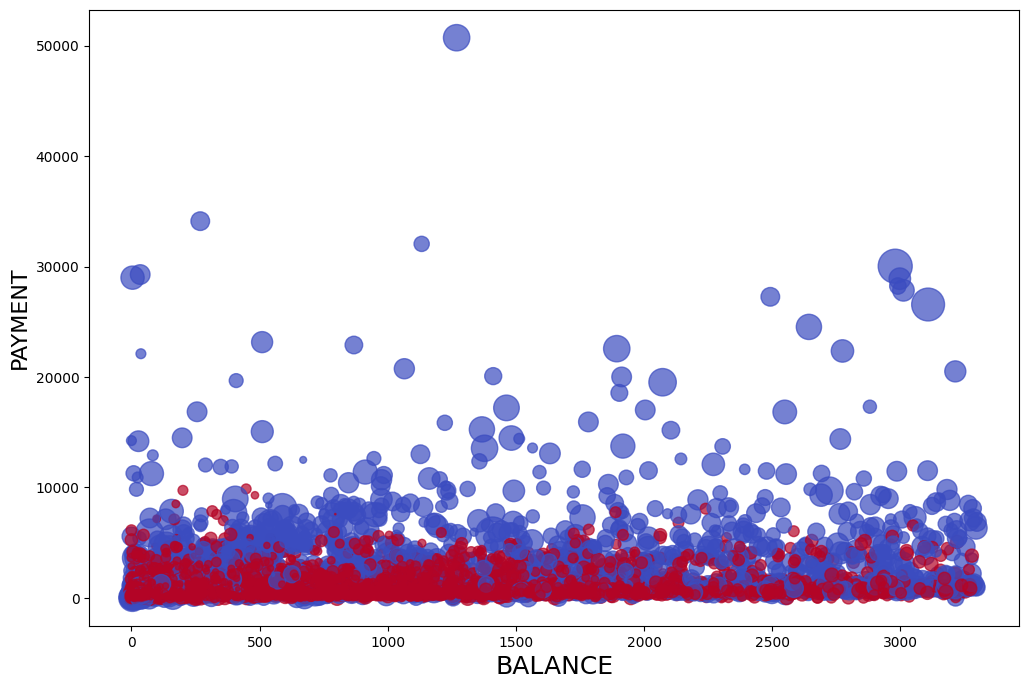

In [37]:
plt.figure(figsize=(12,8))
area = df["CREDIT_LIMIT"]/50
plt.scatter(df['BALANCE'], df['PAYMENTS'], s=area, c=df['CLUSTER'], cmap='coolwarm', alpha=0.7)
plt.xlabel('BALANCE', fontsize=18)
plt.ylabel('PAYMENT', fontsize=16)
plt.show()

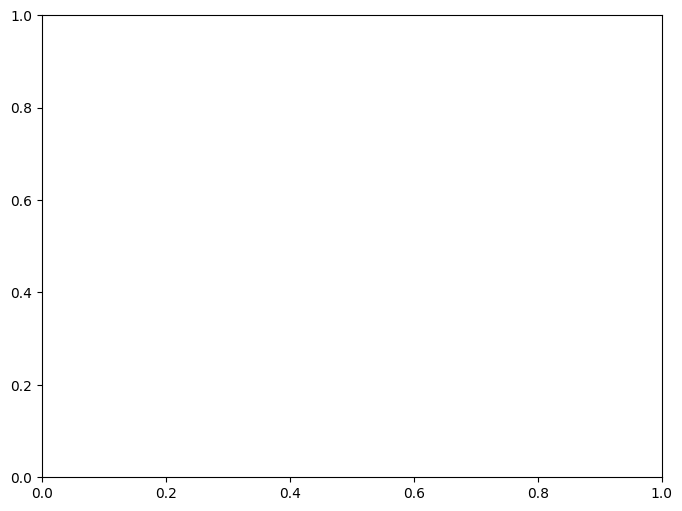

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('PURCHASES')
ax.set_ylabel('BALANCE')
ax.set_zlabel('PURCHASES_TRX')
ax.scatter(df['PURCHASES'], df['BALANCE'], df['PURCHASES_TRX'], c=df['CLUSTER'],
 cmap='coolwarm')
